# Coordinate reference systems

files needed = ('ne_50m_admin_0_countries.zip', 'cb_2021_us_state_5m.zip')

Maps require representing a three dimensional object in two dimensions. This requires projecting the world onto a two-dimensional plane, not unlike what we do when estimating a regression. 

An issue, however, is that there is not perfect way to do this. There are many projections available and each one has pros and cons. This [introduction](https://docs.qgis.org/3.22/en/docs/gentle_gis_introduction/coordinate_reference_systems.html) is nice, especially figure 8.3. Much of the work done on projections focuses on the accuracy of the map, so different projections are used for mapping different parts of the world. 

The good news for us is that we are not trying to make navigable maps. We are making thematic maps. Our maps are typically stylized representations meant to show the spatial dimension of our data. We still need to know a bit about projections. 

Our mapping geometry live in an abstract space and the coordinate reference system (CRS) links the geometry to the locations on the earth. 

In this short notebook, we learn a bit more about CRS. Our goal is to learn how to change the CRS and how different CRS change the shapes of our maps. 

In [1]:
import pandas as pd                         # pandas for data management
import geopandas as gpd                     # geopandas for maps work
import matplotlib.pyplot as plt


C:\Users\kimru\anaconda3\envs\geo3\lib\site-packages\pyproj\__init__.py:91: UserWarning: Valid PROJ data directory not found. Either set the path using the environmental variable PROJ_LIB or with `pyproj.datadir.set_data_dir`.
  warnings.warn(str(err))


Let's load the Natural Earth 1:5,000,000 shape file. It can be found [here](https://www.naturalearthdata.com/downloads/50m-cultural-vectors/), under the "Admin 0 -Countries" section.

The we can plot the world. 

In [2]:
world = gpd.read_file('ne_50m_admin_0_countries/ne_50m_admin_0_countries.shp')

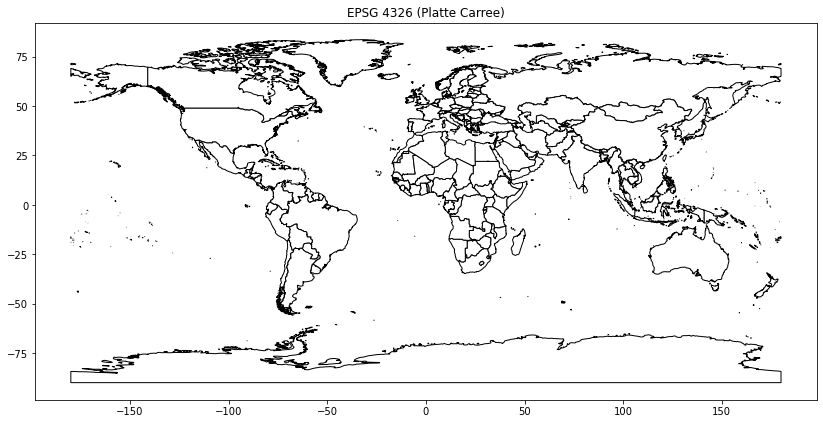

In [3]:
fig, ax = plt.subplots(figsize=(14,8))
world.plot(facecolor='white', edgecolor='black', ax=ax)
#ax.axis('off')
ax.set_title('EPSG 4326 (Platte Carree)')
plt.show()

## Coordinate reference systems (CRS)

There are several systems used to name and catalog coordinate reference systems. We will use the EPSG (European Petroleum Survey Group) numbering. It is widely used and easy to find online. 

We learn about the CRS of our data using the `.crs` attribute. 

In [4]:
world.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

The coordinate reference system for these data are [EPSG 4326](https://epsg.io/4326), or Platte Carree. This is a very popular CRS that uses longitude and latitude. We can see this from the lines 
```
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
```
In the figure, I left the axis on so we can see that they are in degrees longitude and latitude. Since I usually do not make maps for navigation, I normally turn the axis off. 

The website [epsg.io](https://epsg.io/) is a nice place to learn about a specific CRS or to search for a CRS.

## Reprojecting

You might want to change the CRS of your data to something different. This is called reprojecting. I am going to change the projection to [EPSG 3395](https://epsg.io/3395), a [Mercator projection](https://en.wikipedia.org/wiki/Mercator_projection).

The Mercator projection distorts the size of objects. In particular, it inflates the size of objects and this distortion gets larger as we move further from the equator. Mercator is not a good projection to use to look at places far north or south. 

Mercator does not handle Antarctica well, so I drop it before changing CRS. You can comment out the first line below to see what happens if you try to show the severely distorted Antarctica...

We change the CRS using `.to_crs()` and we give the new CRS as the string 'EPSG:3395'.

In [5]:
world_merc = world[~world['NAME'].isin(['Antarctica','Fr. S. Antarctic Lands'])]
world_merc = world_merc.to_crs('EPSG:3395')
world_merc.crs

<Derived Projected CRS: EPSG:3395>
Name: WGS 84 / World Mercator
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World between 80°S and 84°N.
- bounds: (-180.0, -80.0, 180.0, 84.0)
Coordinate Operation:
- name: World Mercator
- method: Mercator (variant A)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Notice the difference in axis units: Mercator axes are in meters. 
```
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
```

Let's plot this next to the 4326, so we can see the differences. 

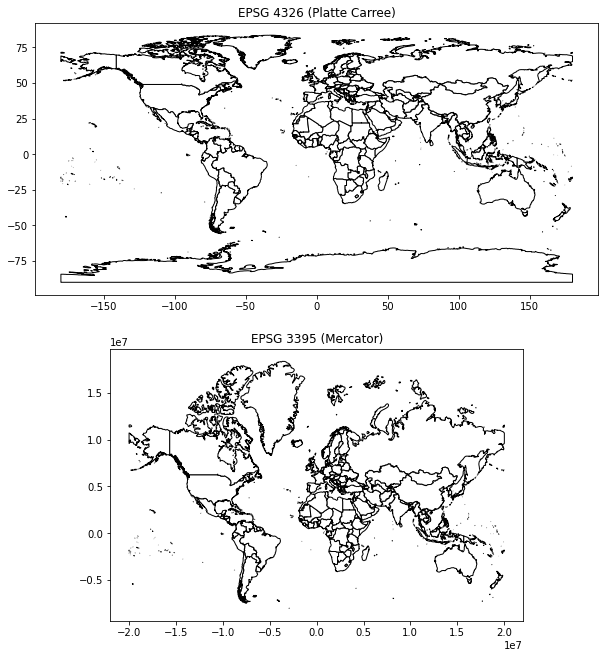

In [6]:
fig, ax = plt.subplots(2, 1, figsize=(15,11))

world.plot(facecolor='white', edgecolor='black', ax=ax[0])
ax[0].set_title('EPSG 4326 (Platte Carree)')

world_merc.plot(facecolor='white', edgecolor='black', ax=ax[1])
ax[1].set_title('EPSG 3395 (Mercator)')

plt.show()

## Practice

1. Load the shape files for the United States' states from the [Census Bureau](https://www.census.gov/geographies/mapping-files/time-series/geo/cartographic-boundary.2021.html#list-tab-1883739534). I am using the 1:5,000,000 files ('cb_2021_us_state_5m.zip'). 

2. In what CRS are the data coded?

3. Pick your favorite U.S. state (Wisconsin, of course) and plot only this state. How does it look?

In [7]:
states = gpd.read_file('cb_2021_us_state_5m/cb_2021_us_state_5m.shp')
states.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

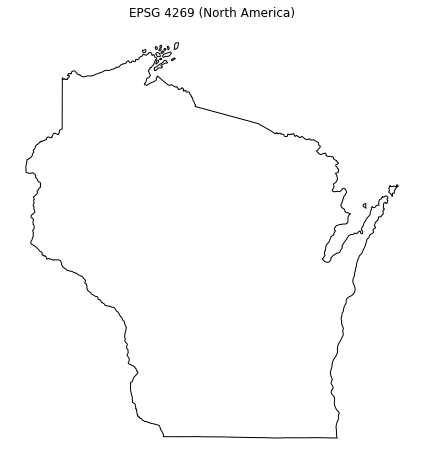

In [8]:
fig, ax = plt.subplots(figsize=(14,8))
states[states['NAME']=='Wisconsin'].plot(facecolor='white', edgecolor='black', ax=ax)
ax.set_title('EPSG 4269 (North America)')
ax.axis('off')
plt.show()

4. Now change the CRS of your data to EPSG 8806. What are the axis units? 

5. Plot your favorite state under the new CRS. How does it look? 

In [9]:
statesa = states.to_crs('EPSG:8806')
statesa.crs

<Compound CRS: EPSG:8806>
Name: NAD83 / Alaska zone 4 + NAVD88 height
Axis Info [cartesian|vertical]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
- H[up]: Gravity-related height (metre)
Area of Use:
- name: United States (USA) - Alaska - between 152°W and 148°W, onshore.
- bounds: (-152.01, 59.11, -147.99, 70.63)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich
Sub CRS:
- NAD83 / Alaska zone 4
- NAVD88 height

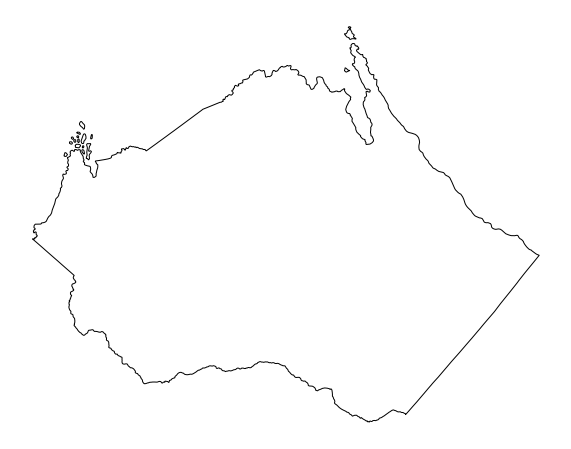

In [11]:
fig, ax = plt.subplots(figsize=(14,8))
statesa[statesa['NAME']=='Wisconsin'].plot(facecolor='white', edgecolor='black', ax=ax)
ax.axis('off')
plt.show()

6. Go to [epsg.io](https://epsg.io/) and learn about EPSG 8806.

7. ESPG 8806 is a projection that focuses on a strip of central Alaska. Alaska is very far north, so to "focus" the map on Alaska, it distorts other states. Plot the entire United States. 

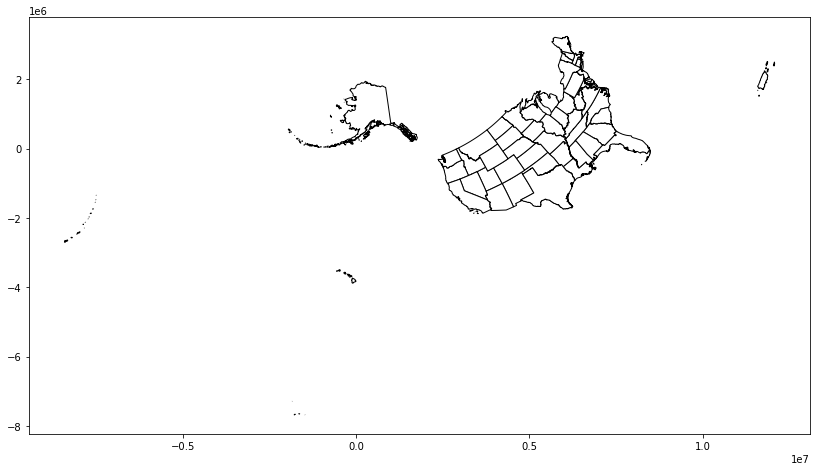

In [13]:
fig, ax = plt.subplots(figsize=(14,8))
statesa.plot(facecolor='white', edgecolor='black', ax=ax)
plt.show()

EPSG 8806 is a good projection for Alaska, but not a good projection for the lower 48!